In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import zscore

import os
df = pd.read_csv("/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent.gz",header=None)
df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]
df[0:5]

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate  outcome  
0                       0.0  normal.  
1                       0.0  normal.  
2                       0.0  normal.  
3                       0.0  normal.  
4                       0.0  normal.  

[5 rows x 42 columns]

In [2]:
df['outcome'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [3]:
scrapdata = pd.read_csv("/kaggle/input/kdddata/KDDCUPdata.csv", skiprows=[1])


In [4]:
scrapdata.head()

duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0        68           TCP  Unknown   SF         48         48     0   
1        40           TCP  Unknown   SF         20         20     0   
2        64           TCP  Unknown   SF         44         44     0   
3        40           TCP  Unknown   SF         20         20     0   
4        64           UDP  Unknown   SF         44         44     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0   10  ...                   0   
1               0       0   10  ...                   0   
2               0       0    2  ...                   0   
3               0       0    6  ...                   0   
4               0       0    7  ...                   0   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     0.0                     0.0   
1                     0.0                     0.0   
2                     0.0                     0.0   
3                     0.0                     0.0   
4                     0.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                          0.0                         0.03   
1                          0.0                         0.03   
2                          0.0                         0.03   
3                          0.0                         0.03   
4                          0.0                         0.03   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate  outcome  
0                       0.0      NaN  
1                       0.0      NaN  
2                       0.0      NaN  
3                       0.0      NaN  
4                       0.0      NaN  

[5 rows x 42 columns]

In [5]:
# df=scrapdata

In [6]:
print("The Number of features are : ", df.shape[1])
print("="*125)
output = df['outcome'].values
labels = set(output)
print('The different type of output labels are:', labels)
print('='*125)
print('The number of different output labels are:', len(labels))
print('='*125)

df.drop_duplicates(keep='first', inplace = True)
df.dropna(inplace=True,axis=1) 

print("Read {} rows.".format(len(df)))

The Number of features are :  42
The different type of output labels are: {'ipsweep.', 'loadmodule.', 'guess_passwd.', 'phf.', 'imap.', 'spy.', 'teardrop.', 'multihop.', 'satan.', 'neptune.', 'rootkit.', 'smurf.', 'warezclient.', 'perl.', 'normal.', 'buffer_overflow.', 'portsweep.', 'land.', 'ftp_write.', 'pod.', 'back.', 'warezmaster.', 'nmap.'}
The number of different output labels are: 23
Read 145586 rows.


In [7]:
# df=scrapdata

In [8]:
print(df.columns)


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'outcome'],
      dtype='object')


In [9]:
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd
    
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)    

encode_numeric_zscore(df, 'duration')
encode_text_dummy(df, 'protocol_type')
encode_text_dummy(df, 'service')
encode_text_dummy(df, 'flag')
encode_numeric_zscore(df, 'src_bytes')
encode_numeric_zscore(df, 'dst_bytes')
encode_text_dummy(df, 'land')
encode_numeric_zscore(df, 'wrong_fragment')
encode_numeric_zscore(df, 'urgent')
encode_numeric_zscore(df, 'hot')
encode_numeric_zscore(df, 'num_failed_logins')
encode_text_dummy(df, 'logged_in')
encode_numeric_zscore(df, 'num_compromised')
encode_numeric_zscore(df, 'root_shell')
encode_numeric_zscore(df, 'su_attempted')
encode_numeric_zscore(df, 'num_root')
encode_numeric_zscore(df, 'num_file_creations')
encode_numeric_zscore(df, 'num_shells')
encode_numeric_zscore(df, 'num_access_files')
encode_numeric_zscore(df, 'num_outbound_cmds')
encode_text_dummy(df, 'is_host_login')
encode_text_dummy(df, 'is_guest_login')
encode_numeric_zscore(df, 'count')
encode_numeric_zscore(df, 'srv_count')
encode_numeric_zscore(df, 'serror_rate')
encode_numeric_zscore(df, 'srv_serror_rate')
encode_numeric_zscore(df, 'rerror_rate')
encode_numeric_zscore(df, 'srv_rerror_rate')
encode_numeric_zscore(df, 'same_srv_rate')
encode_numeric_zscore(df, 'diff_srv_rate')
encode_numeric_zscore(df, 'srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_count')
encode_numeric_zscore(df, 'dst_host_srv_count')
encode_numeric_zscore(df, 'dst_host_same_srv_rate')
encode_numeric_zscore(df, 'dst_host_diff_srv_rate')
encode_numeric_zscore(df, 'dst_host_same_src_port_rate')
encode_numeric_zscore(df, 'dst_host_srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_serror_rate')
encode_numeric_zscore(df, 'dst_host_srv_serror_rate')
encode_numeric_zscore(df, 'dst_host_rerror_rate')
encode_numeric_zscore(df, 'dst_host_srv_rerror_rate')


df.dropna(inplace=True,axis=1)
df[0:5] 

/tmp/ipykernel_18/2212680133.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[dummy_name] = dummies[x]
/tmp/ipykernel_18/2212680133.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[dummy_name] = dummies[x]
/tmp/ipykernel_18/2212680133.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
 

duration  src_bytes  dst_bytes  wrong_fragment    urgent       hot  \
0  -0.10785  -0.004293   0.042595       -0.084394 -0.004737 -0.070209   
1  -0.10785  -0.004261  -0.039036       -0.084394 -0.004737 -0.070209   
2  -0.10785  -0.004263  -0.025042       -0.084394 -0.004737 -0.070209   
3  -0.10785  -0.004272  -0.025042       -0.084394 -0.004737 -0.070209   
4  -0.10785  -0.004273  -0.013613       -0.084394 -0.004737 -0.070209   

   num_failed_logins  num_compromised  root_shell  su_attempted  ...  flag-S3  \
0          -0.018022        -0.007905    -0.01944     -0.008613  ...    False   
1          -0.018022        -0.007905    -0.01944     -0.008613  ...    False   
2          -0.018022        -0.007905    -0.01944     -0.008613  ...    False   
3          -0.018022        -0.007905    -0.01944     -0.008613  ...    False   
4          -0.018022        -0.007905    -0.01944     -0.008613  ...    False   

   flag-SF  flag-SH  land-0  land-1  logged_in-0  logged_in-1  \
0     True    False    True   False        False         True   
1     True    False    True   False        False         True   
2     True    False    True   False        False         True   
3     True    False    True   False        False         True   
4     True    False    True   False        False         True   

   is_host_login-0  is_guest_login-0  is_guest_login-1  
0             True              True             False  
1             True              True             False  
2             True              True             False  
3             True              True             False  
4             True              True             False  

[5 rows x 121 columns]

In [10]:
print(df.columns)


Index(['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted',
       ...
       'flag-S3', 'flag-SF', 'flag-SH', 'land-0', 'land-1', 'logged_in-0',
       'logged_in-1', 'is_host_login-0', 'is_guest_login-0',
       'is_guest_login-1'],
      dtype='object', length=121)


In [11]:
x_columns = df.columns.drop('outcome')
x = df[x_columns].values
dummies = pd.get_dummies(df['outcome'])
outcomes = dummies.columns
num_classes = len(outcomes)
y = dummies.values

df.groupby('outcome')['outcome'].count()
dummies


back.  buffer_overflow.  ftp_write.  guess_passwd.  imap.  ipsweep.  \
0       False             False       False          False  False     False   
1       False             False       False          False  False     False   
2       False             False       False          False  False     False   
3       False             False       False          False  False     False   
4       False             False       False          False  False     False   
...       ...               ...         ...            ...    ...       ...   
494016  False             False       False          False  False     False   
494017  False             False       False          False  False     False   
494018  False             False       False          False  False     False   
494019  False             False       False          False  False     False   
494020  False             False       False          False  False     False   

        land.  loadmodule.  multihop.  neptune.  ...   phf.   pod.  \
0       False        False      False     False  ...  False  False   
1       False        False      False     False  ...  False  False   
2       False        False      False     False  ...  False  False   
3       False        False      False     False  ...  False  False   
4       False        False      False     False  ...  False  False   
...       ...          ...        ...       ...  ...    ...    ...   
494016  False        False      False     False  ...  False  False   
494017  False        False      False     False  ...  False  False   
494018  False        False      False     False  ...  False  False   
494019  False        False      False     False  ...  False  False   
494020  False        False      False     False  ...  False  False   

        portsweep.  rootkit.  satan.  smurf.   spy.  teardrop.  warezclient.  \
0            False     False   False   False  False      False         False   
1            False     False   False   False  False      False         False   
2            False     False   False   False  False      False         False   
3            False     False   False   False  False      False         False   
4            False     False   False   False  False      False         False   
...            ...       ...     ...     ...    ...        ...           ...   
494016       False     False   False   False  False      False         False   
494017       False     False   False   False  False      False         False   
494018       False     False   False   False  False      False         False   
494019       False     False   False   False  False      False         False   
494020       False     False   False   False  False      False         False   

        warezmaster.  
0              False  
1              False  
2              False  
3              False  
4              False  
...              ...  
494016         False  
494017         False  
494018         False  
494019         False  
494020         False  

[145586 rows x 23 columns]

In [12]:
import io
import requests
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.losses import SparseCategoricalCrossentropy


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.transform(x_test)
ros_scaler = StandardScaler()
x_train = ros_scaler.fit_transform(x_train)
x_test = ros_scaler.transform(x_test)

mlp = Sequential()

mlp.add(Dense(units=50, input_dim=x_train.shape[1], activation='relu'))

mlp.add(Dense(units=23, activation='softmax'))

mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = mlp.fit(x_train, y_train, epochs=10, batch_size=500, validation_split=0.2)
test_results = mlp.evaluate(x_test, y_test, verbose=1)
print(test_results[0],test_results[1]*100)

2024-05-15 11:05:52.648217: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-15 11:05:52.648408: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-15 11:05:52.829405: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8359 - loss: 1.1266 - val_accuracy: 0.9806 - val_loss: 0.1009
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9837 - loss: 0.0833 - val_accuracy: 0.9875 - val_loss: 0.0595
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9876 - loss: 0.0499 - val_accuracy: 0.9880 - val_loss: 0.0428
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9901 - loss: 0.0327 - val_accuracy: 0.9934 - val_loss: 0.0330
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9947 - loss: 0.0236 - val_accuracy: 0.9956 - val_loss: 0.0280
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9966 - loss: 0.0190 - val_accuracy: 0.9962 - val_loss: 0.0250
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9971 - loss: 0.0163 - val_accuracy: 0.9964 - val_loss: 0.0233
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9975 - loss: 0.0142 - val_accuracy: 0.

In [13]:
test_results

[0.014600353315472603, 0.9975547194480896]

In [14]:
x_test

array([[-0.10838621, -0.00458928, -0.04724395, ...,  0.        ,
         0.06917495, -0.06917495],
       [-0.10838621, -0.00458928, -0.04724395, ...,  0.        ,
         0.06917495, -0.06917495],
       [-0.10838621, -0.00458928, -0.04724395, ...,  0.        ,
         0.06917495, -0.06917495],
       ...,
       [-0.10838621, -0.00444127, -0.04638098, ...,  0.        ,
         0.06917495, -0.06917495],
       [-0.10838621, -0.00458928, -0.04724395, ...,  0.        ,
         0.06917495, -0.06917495],
       [-0.10838621, -0.00443032,  0.01459612, ...,  0.        ,
         0.06917495, -0.06917495]])

In [15]:
predictres=mlp.predict(x_test)

1138/1138 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [16]:
predictres

array([[3.7460331e-06, 2.8538136e-06, 6.8602856e-07, ..., 1.4688766e-05,
        7.3875782e-07, 3.1053664e-06],
       [4.4858812e-06, 1.4092681e-06, 4.0618420e-06, ..., 1.3610404e-05,
        4.5013238e-07, 8.0115278e-06],
       [6.6469456e-06, 2.3981640e-06, 5.9773784e-06, ..., 1.8066497e-05,
        7.4220975e-07, 1.3115470e-05],
       ...,
       [7.8822333e-05, 9.7249540e-07, 6.9937153e-07, ..., 1.5558762e-06,
        1.2220169e-06, 1.7136130e-06],
       [7.5217190e-06, 6.9585499e-06, 1.3165417e-06, ..., 2.7894228e-05,
        1.6401698e-06, 5.4800480e-06],
       [9.2158261e-05, 9.9324916e-07, 9.1202696e-07, ..., 1.7571099e-06,
        1.4763056e-06, 2.1694639e-06]], dtype=float32)

In [17]:
# Get the predicted class labels
predicted_classes = np.argmax(predictres, axis=1)

# Decode the predicted class labels
predicted_outcomes = [outcomes[idx] for idx in predicted_classes]

# Convert the original test outcomes back into their original form
original_outcomes = [outcomes[np.argmax(outcome)] for outcome in y_test]

# Display the first few rows of original outcomes and predicted outcomes for comparison
for i in range(5):
    print("Original Outcome:", original_outcomes[i], "\tPredicted Outcome:", predicted_outcomes[i])


Original Outcome: neptune. 	Predicted Outcome: neptune.
Original Outcome: neptune. 	Predicted Outcome: neptune.
Original Outcome: neptune. 	Predicted Outcome: neptune.
Original Outcome: neptune. 	Predicted Outcome: neptune.
Original Outcome: neptune. 	Predicted Outcome: neptune.


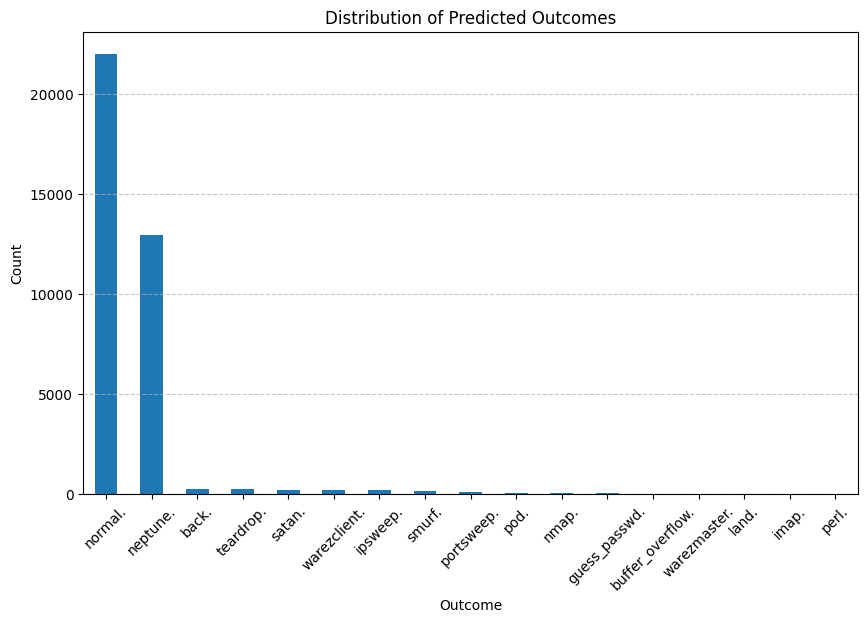

In [18]:
import matplotlib.pyplot as plt

predicted_counts = pd.Series(predicted_outcomes).value_counts()

plt.figure(figsize=(10, 6))
predicted_counts.plot(kind='bar')
plt.title('Distribution of Predicted Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
